In [ ]:
import pandas as pd

df = pd.read_csv('Move_Ratings.csv')

display(df)


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,6.679387e+07,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131,0,2020,4.667863e+01,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132,4,2000,3.639134e+01,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132,1,2015,9.324732e+01,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119,1,2015,9.213021e+01,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,"""Shadow Strike""",128,3,2021,6.489702e+01,91.445593,Fall,PG,Action,"""Weak and contrived dialogue that lacks authen...","""An overemphasis on spectacle over substance t...","""Unremarkable cinematography that fails to cre...",False
536,536,"""Riot Protocol""",123,1,2018,3.098935e+01,46.045408,Summer,R,Action,"""A film that lingers in the memory.""","""A celebration of life and its intricacies.""","""A cinematic tour de force that enchants.""",True
537,537,"""Deadlock Vendetta""",121,1,2003,4.857255e+01,63.660912,Summer,PG,Action,"""A lack of cohesion in the storytelling that m...","""An overly convoluted plot that confuses rathe...","""Flat and unconvincing performances that fail ...",False
538,538,"""Blade Runner Protocol""",124,1,2007,1.364682e+02,188.513344,Summer,R,Action,"""An evocative journey that captivates the soul.""","""An absence of emotional depth, resulting in a...","""A triumph in storytelling and authenticity.""",True


In [ ]:
import numpy as np

mean_runtime = np.floor(df['Runtime'].mean())
df['Runtime'] = df['Runtime'].replace(0, mean_runtime)

print(df['Runtime'][10])

mean_star = np.ceil(df['Stars'].mean())
df['Stars'] = df['Stars'].replace(100, mean_star)

print(df['Stars'][22])

126
2


The first immediate issue I noticed was that the runtime column had 0 minutes in some places. This was a pretty easy fix as I replaced all 0s with the mean runtime for the movies which happens to be around 126.1 minutes long.I also grouped in that there was a couple numbers in the stars column that had a 100 stars which was a clear outlier so I also did the same thing for that as well.

In [ ]:
genre_order = {
    'Romantic Comedy': 1,
    'Action': 2,
    'Fantasy': 3,
    'Science Fiction': 4,
    'Drama': 5,
}

df['Genre_Order'] = df['Genre'].map(genre_order)

df.sort_values(by='Genre_Order', inplace=True)
df.drop(columns=['Genre_Order'], inplace=True)

For this second issue I noticed the grouping in the genre catagory was a little messed up. I wanted every genre to be next to each other instead of some of them being seperated so I created a map that would make a new column with the genres sorted using that map and then after sorting Genre I just dropped the genre_order column.

In [ ]:
max_budget = 300

df = df[df['Budget'] <= max_budget]
df = df[df['Promo'] <= max_budget]

For this last one, after looking at the values in the budget and the promos, there are some clear extremeties at random spots where the values are just way too high. to counter that, I gave a reasonable max budget of 300 million where both the promo and the budget do not exceed in normal conditions. The extreme values will be filterd out this way and dropped.

**p-value:** As we know we want to compare this p value with 0.05. the p value is approx. 0.008. That is an extremely low p value suggesting there is a significant association between the season and the success of a movie. This makes a lot of sense. Trends have shown in the past that horror movies do the best around halloween and rom coms and christmas movies will obviously do the best during the winter time. Releasing a cozy home body movie during the summer would flop.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Success'], df['Season'])
_, p, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p}")

P-value: 0.006637852852197432


**p-value:** With a P value of 0.3, that is well above 0.05. That means that there is not a high stastical significance between the rating of the movie and the season. I believe this makes a lot of sense as

In [ ]:
contingency_table = pd.crosstab(df['Season'], df['Rating'])
_, p, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p}")

P-value: 0.29772526299101215


**Critic:** R1 is the harshest critic with the highest percentage of 51%

In [ ]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['R1_Scores'] = df['R1'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['R2_Scores'] = df['R2'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['R3_Scores'] = df['R3'].apply(lambda x: sia.polarity_scores(x)['compound'])

negative_threshold = 0

df['R1_Negative'] = df['R1_Scores'].apply(lambda x: 1 if x < negative_threshold else 0)
df['R2_Negative'] = df['R2_Scores'].apply(lambda x: 1 if x < negative_threshold else 0)
df['R3_Negative'] = df['R2_Scores'].apply(lambda x: 1 if x < negative_threshold else 0)


number_R1 = (df['R1_Negative'] == 1).sum()
number_R2 = (df['R2_Negative'] == 1).sum()
number_R3 = (df['R3_Negative'] == 1).sum()

print(f"R1 has {number_R1} negative reviews, R2 has {number_R2} negative reviews, and R3 has {number_R3} negative reviews.\nTherefore, R1 has the most negative reviews with a percentage of {number_R1/len(df) * 100}% negative reviews")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


R1 has 261 negative reviews, R2 has 204 negative reviews, and R3 has 204 negative reviews.
Therefore, R1 has the most negative reviews with a percentage of 50.877192982456144% negative reviews


In [ ]:
covariance = df['Promo'].cov(df['Budget'])

print(f"covariance is: {covariance}")

covariance is: 1772.1987605539105


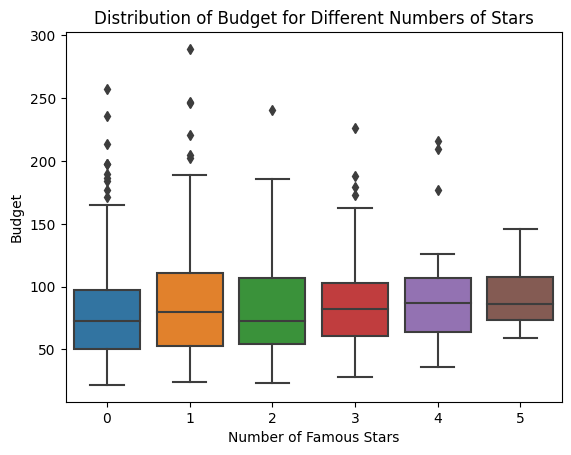

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Stars', y='Budget', data=df)

plt.xlabel('Number of Famous Stars')
plt.ylabel('Budget')
plt.title('Distribution of Budget for Different Numbers of Stars')

plt.show()


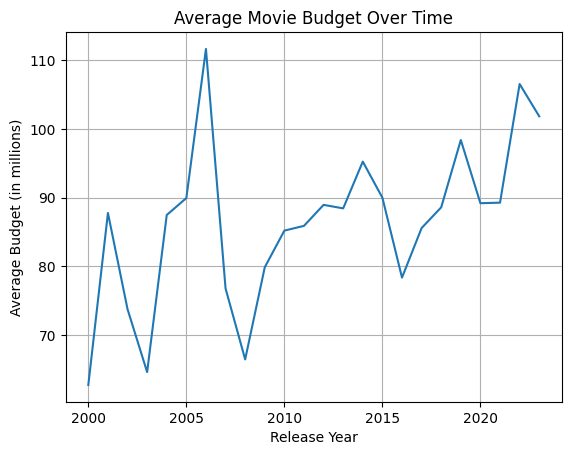

In [ ]:
average_budget = df.groupby('Year')['Budget'].mean()

plt.plot(average_budget)

plt.xlabel('Release Year')
plt.ylabel('Average Budget (in millions)')
plt.title('Average Movie Budget Over Time')


plt.grid(True)
plt.show()


I have made two features here. The first is an extra column to get how old the movie is in comparsion to now and when it was realeased.
After that I have also made a feature one-hot-encoding the Rating column!

In [ ]:
current_year = 2023
df['Age_of_Movie'] = current_year - df['Year']

rating_one_hot = pd.get_dummies(df['Rating'], prefix='Rating')
df = pd.concat([df, rating_one_hot], axis=1)
display(df)


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,...,R1_Scores,R2_Scores,R3_Scores,R1_Negative,R2_Negative,R3_Negative,Age_of_Movie,Rating_PG,Rating_PG13,Rating_R
80,80,"""The Proposal Planner""",126,1,2019,40.763452,20.436037,Summer,PG13,Romantic Comedy,...,0.1154,0.0000,-0.4215,0,0,0,4,0,1,0
79,79,"""Love in a Time Capsule""",136,1,2000,81.366262,42.910317,Fall,PG,Romantic Comedy,...,-0.2263,0.7717,-0.4215,1,0,0,23,1,0,0
78,78,"""The Love Cafe""",135,1,2011,103.773391,83.088157,Spring,PG,Romantic Comedy,...,-0.3182,0.2960,0.4767,1,0,0,12,1,0,0
77,77,"""Heartstrings and Happily Ever Afters""",133,2,2018,240.331532,215.341896,Summer,PG,Romantic Comedy,...,-0.4767,-0.4215,0.6124,1,1,1,5,1,0,0
76,76,"""The Love Flashback""",145,2,2005,106.904348,142.358349,Fall,R,Romantic Comedy,...,-0.2263,0.0000,0.0000,1,0,0,18,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,"""The Stellar Standoff: Alien Neighbors and The...",131,3,2002,65.322033,38.213480,Winter,R,Science fiction,...,-0.8860,0.2023,0.7430,1,0,0,21,0,0,1
266,266,"""The Nebula Navigators: Lost in Hyperspace wit...",125,3,2017,60.637333,54.568341,Spring,PG13,Science fiction,...,0.0000,0.4215,-0.8885,0,0,0,6,0,1,0
267,267,"""The Quantum Quagmire: Adventures in the Multi...",140,1,2014,125.861055,148.882409,Summer,PG13,Science fiction,...,0.0000,-0.3182,-0.7430,0,1,1,9,0,1,0
268,268,"""The Comet Conspiracy: A Tale of Intergalactic...",127,1,2004,79.603993,109.783665,Spring,PG13,Science fiction,...,-0.3182,0.3400,0.7650,1,0,0,19,0,1,0




**Model type choosen:** Logistic Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Budget', 'Promo', 'Rating_PG', 'Age_of_Movie', 'Stars', 'Rating_PG13', 'Rating_R']]
y = df['Success']


In [ ]:
df_shuffled = df.sample(frac=1, random_state=1)

train_size = 0.9
test_size = 1 - train_size
X_train, X_test, y_train, y_test = train_test_split(
    df_shuffled[['Promo', 'Budget', 'Rating_PG', 'Age_of_Movie', 'Stars', 'Rating_PG13', 'Rating_R']],
    df_shuffled['Success'],
    test_size=0.1,
    random_state=1
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy * 100}%")

Model Accuracy on Test Set: 86.53846153846155%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
total = conf_matrix.sum()
false_negatives = conf_matrix[1, 0] / total
false_positives = conf_matrix[0, 1] / total
print(f"False negative rate: {false_negatives * 100}%")
print(f"False positive rate: {false_positives * 100}%")


False negative rate: 9.615384615384617%
False positive rate: 3.8461538461538463%


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:**


In [ ]:
feature_importances = model.coef_[0]
feature_names = X_train.columns
sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)



[('Stars', 0.6203415602851664),
 ('Budget', 0.42156015258023183),
 ('Promo', 0.10770307405095275),
 ('Rating_R', 0.10298629379236099),
 ('Rating_PG', -0.03381606714603088),
 ('Age_of_Movie', -0.04292227554809824),
 ('Rating_PG13', -0.06613207385318395)]

As we can see from the coeeficient importance Stars has the highest one!